# Step 1: Explore the dataset

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
amazon = pd.read_csv('amazon_close.csv',
                      index_col='date',
                      parse_dates=True)

In [3]:
# Data information
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-02-08 to 2014-02-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [4]:
# Check for missing values
amazon.isnull().sum()

close    0
dtype: int64

In [5]:
# Check for duplicates
amazon.duplicated().sum()

9

In [6]:
# Check for outliers
amazon.describe()

,close
count,1259.000000
mean,849.730116
std,486.737426
min,286.950000
25%,425.740000
50%,752.610000
75%,1121.915000
max,2039.510000


# Step 2: Check for stationarity of time series

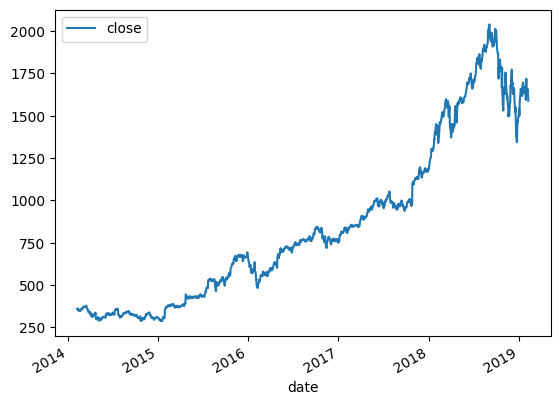

In [7]:
# Plot data
amazon.plot()
plt.show()

# ARMA

In [15]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Mon, 19 Jun 2023   AIC                          11076.743
Time:                        13:22:52   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9873      0.459     -2.151      0.031      -1.887      -0.088
ar.L1         -0.1542      0.078     -1.988      0.047      -0.306      -0.002
ar.L2          0.7944      0.080      9.960      0.0

In [16]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Add the last value of the original DataFrame to make your forecast an absolute value.
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    358.768019
1259    358.147337
1260    356.218012
1261    355.667190
1262    353.864253
1263    353.349441
1264    351.641354
1265    351.140525
1266    349.505631
1267    349.004626
Name: predicted_mean, dtype: float64


# ARIMA

In [18]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

1259    359.999504
1260    360.588036
1261    359.811473
1262    360.403607
1263    359.698947
1264    360.281120
1265    359.633754
1266    360.198081
1267    359.598124
1268    360.140267
Name: predicted_mean, dtype: float64


## Choosing ARIMA model
You are trying to figure out which ARIMA model is the best fit for a dataset after trying different degrees of differencing and applying the Augmented Dicky-Fuller test on the differenced data. The test statistics were these:

Order of difference	ADF statistic	p-value

0  2.198 0.999

1 -2.598 0.093

2 -14.448 0.000

3 -17.147 0.000

Which kind of ARIMA model should you fit to this time series data?
- ARIMA(p,0,q)
- ARIMA(p,1,q)
- ARIMA(p,2,q)
- ARIMA(p,3,q)

Based on the provided Augmented Dickey-Fuller test statistics and p-values, we can determine the appropriate kind of ARIMA model to fit to the time series data:
- The time series becomes stationary after the second difference (order of difference 2) since the p-value is below the significance level of 0.05. Therefore, the appropriate ARIMA model to fit to this time series data is ARIMA(p,2,q).

# AR or MA

Remember that for different types of models we expect the following behavior in the ACF and PACF:

### ACF	
- AR(p): Tails off	
- MA(q): Cuts off after lag q	
- ARMA(p,q): Tails off

### PACF	
- AR(p): Cuts off after lag p	
- MA(q): Tails off	
- ARMA(p,q): Tails off

In [19]:
# import acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

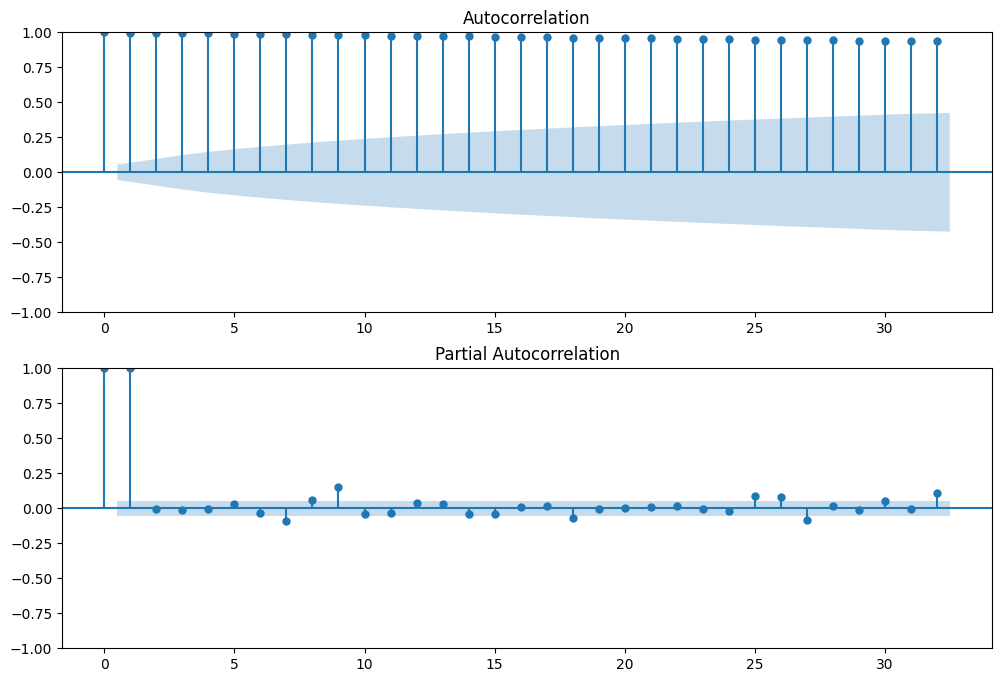

In [24]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(amazon, ax=ax1)

# Plot PACF
plot_pacf(amazon, ax=ax2)

plt.show()

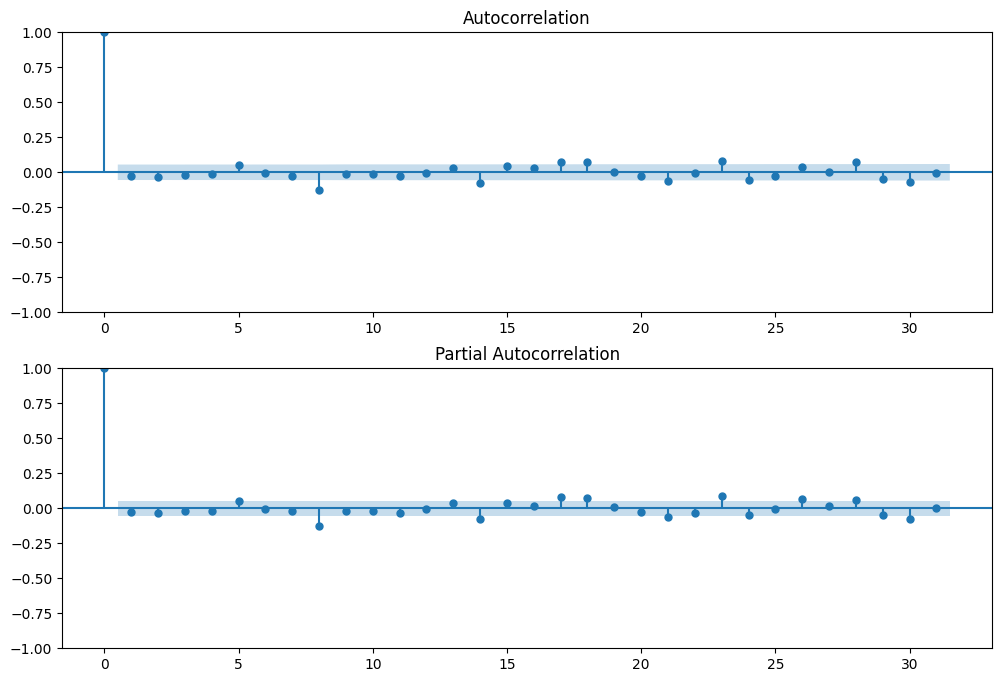

In [26]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(amazon_diff, ax=ax1)

# Plot PACF
plot_pacf(amazon_diff, ax=ax2)

plt.show()

# ACF and PACF

In [28]:
# Load earthquake data
earthquake = pd.read_csv('earthquakes.csv',
                          index_col='date',
                          parse_dates=True)

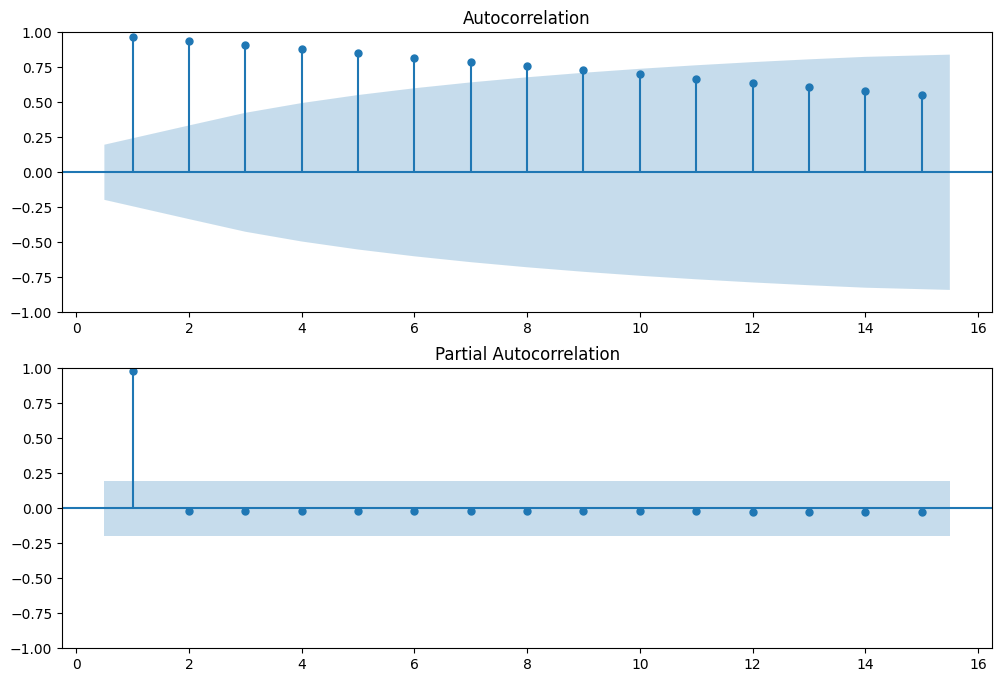

In [31]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(earthquake.iloc[:, 0], lags=15, zero=False, ax=ax1)

# Plot PACF
plot_pacf(earthquake.iloc[:, 0], lags=15, zero=False, ax=ax2)

plt.show()


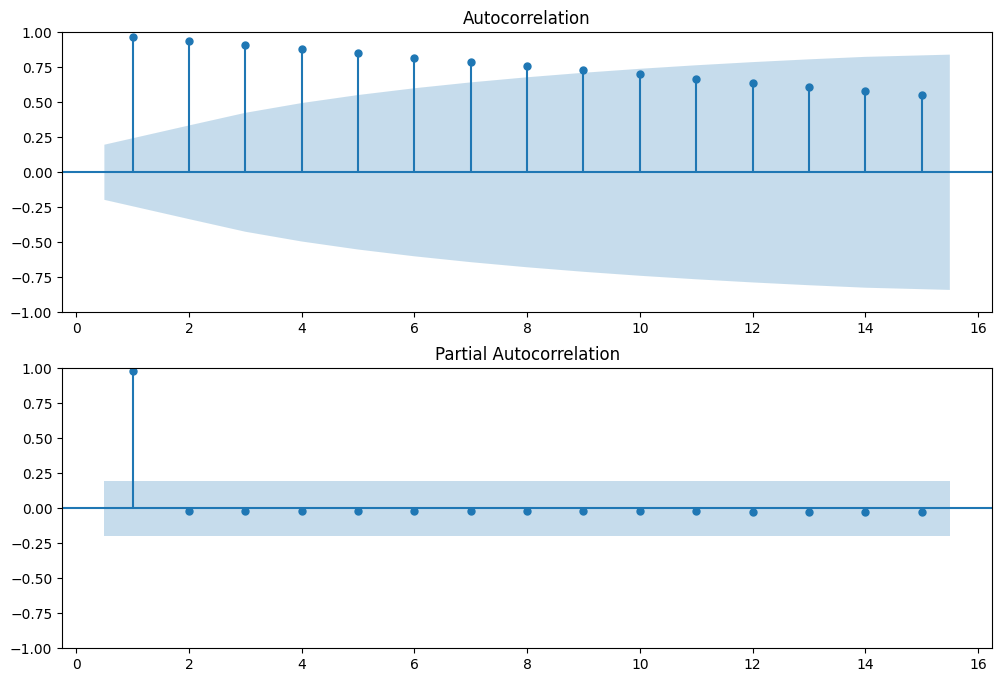

ValueError: SARIMAX models require univariate `endog`. Got shape (99, 2).

In [34]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake.iloc[:, 0], lags=15, zero=False, ax=ax1)
plot_pacf(earthquake.iloc[:, 0], lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = ARIMA(earthquake, order=(1, 0, 0))

# Train model
results = model.fit()